<img src="./pic/sharif-main-logo.png" alt="SUT logo" width=345 height=345 align=left class="saturate">


<br>
<font>
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Machine Learning <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Fall 2024<br>
<font color=3C99D size=5>
    Practical Assignment 2 - Unsupervised Learning<br>
<font color=696880 size=4>
    Assignment Supervisor: Niki Sepasian <br>
<font color=696880 size=5>
    Asemaneh Nafe


In [14]:
student_number = 403206479
full_name = 'Emadeddin Rostamian'
assert student_number and full_name is not None, 'please input your information'

In [15]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster

<font color=red size=3>
notice that you can not use sklearn.decomposition and sklearn.cluster libary in this home work! you should implement pca and kmeans from scratch.

## Overview
In this assignment, you will perform PCA and K-Means clustering on credit card customer data. dataset contains information about customer’s use of credit cards. The goal is to reduce the dataset’s dimensionality using PCA and then apply clustering to segment customers. You will compare the clustering performance both before and after PCA. Additionally, you'll be asked to explain the theory and decisions behind each step.

## Data Preprocessing (15 points)
Read the dataset.CSV file and display a few samples.

In [16]:
# todo
df = pd.read_csv('dataset.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Display dataset information.

In [17]:
# todo
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

Which column do you think might be the most irrelevant for PCA and clustering?
<br>
Answer: CUST_ID

In [18]:
# Exclude irrelevant feature
df.drop('CUST_ID', axis=1, inplace = True)
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


how do you handle missing data, and why did you choose this method?
<br>
Answer: Imputation using Median Values.
\
**Reasons** : 1. Robust to Outliers 2. Preserves Data Size 3. Simple and Efficient


In [19]:
#Fill missing data
missing_columns = df.columns[df.isnull().any()]
for column in missing_columns:
  median_value = df[column].median()
  df[column].fillna(median_value, inplace=True)

<ipython-input-19-a9cf2c5d9fee>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(median_value, inplace=True)


plot the correlation matrix and identify redundant features.remove them from the dataframe.

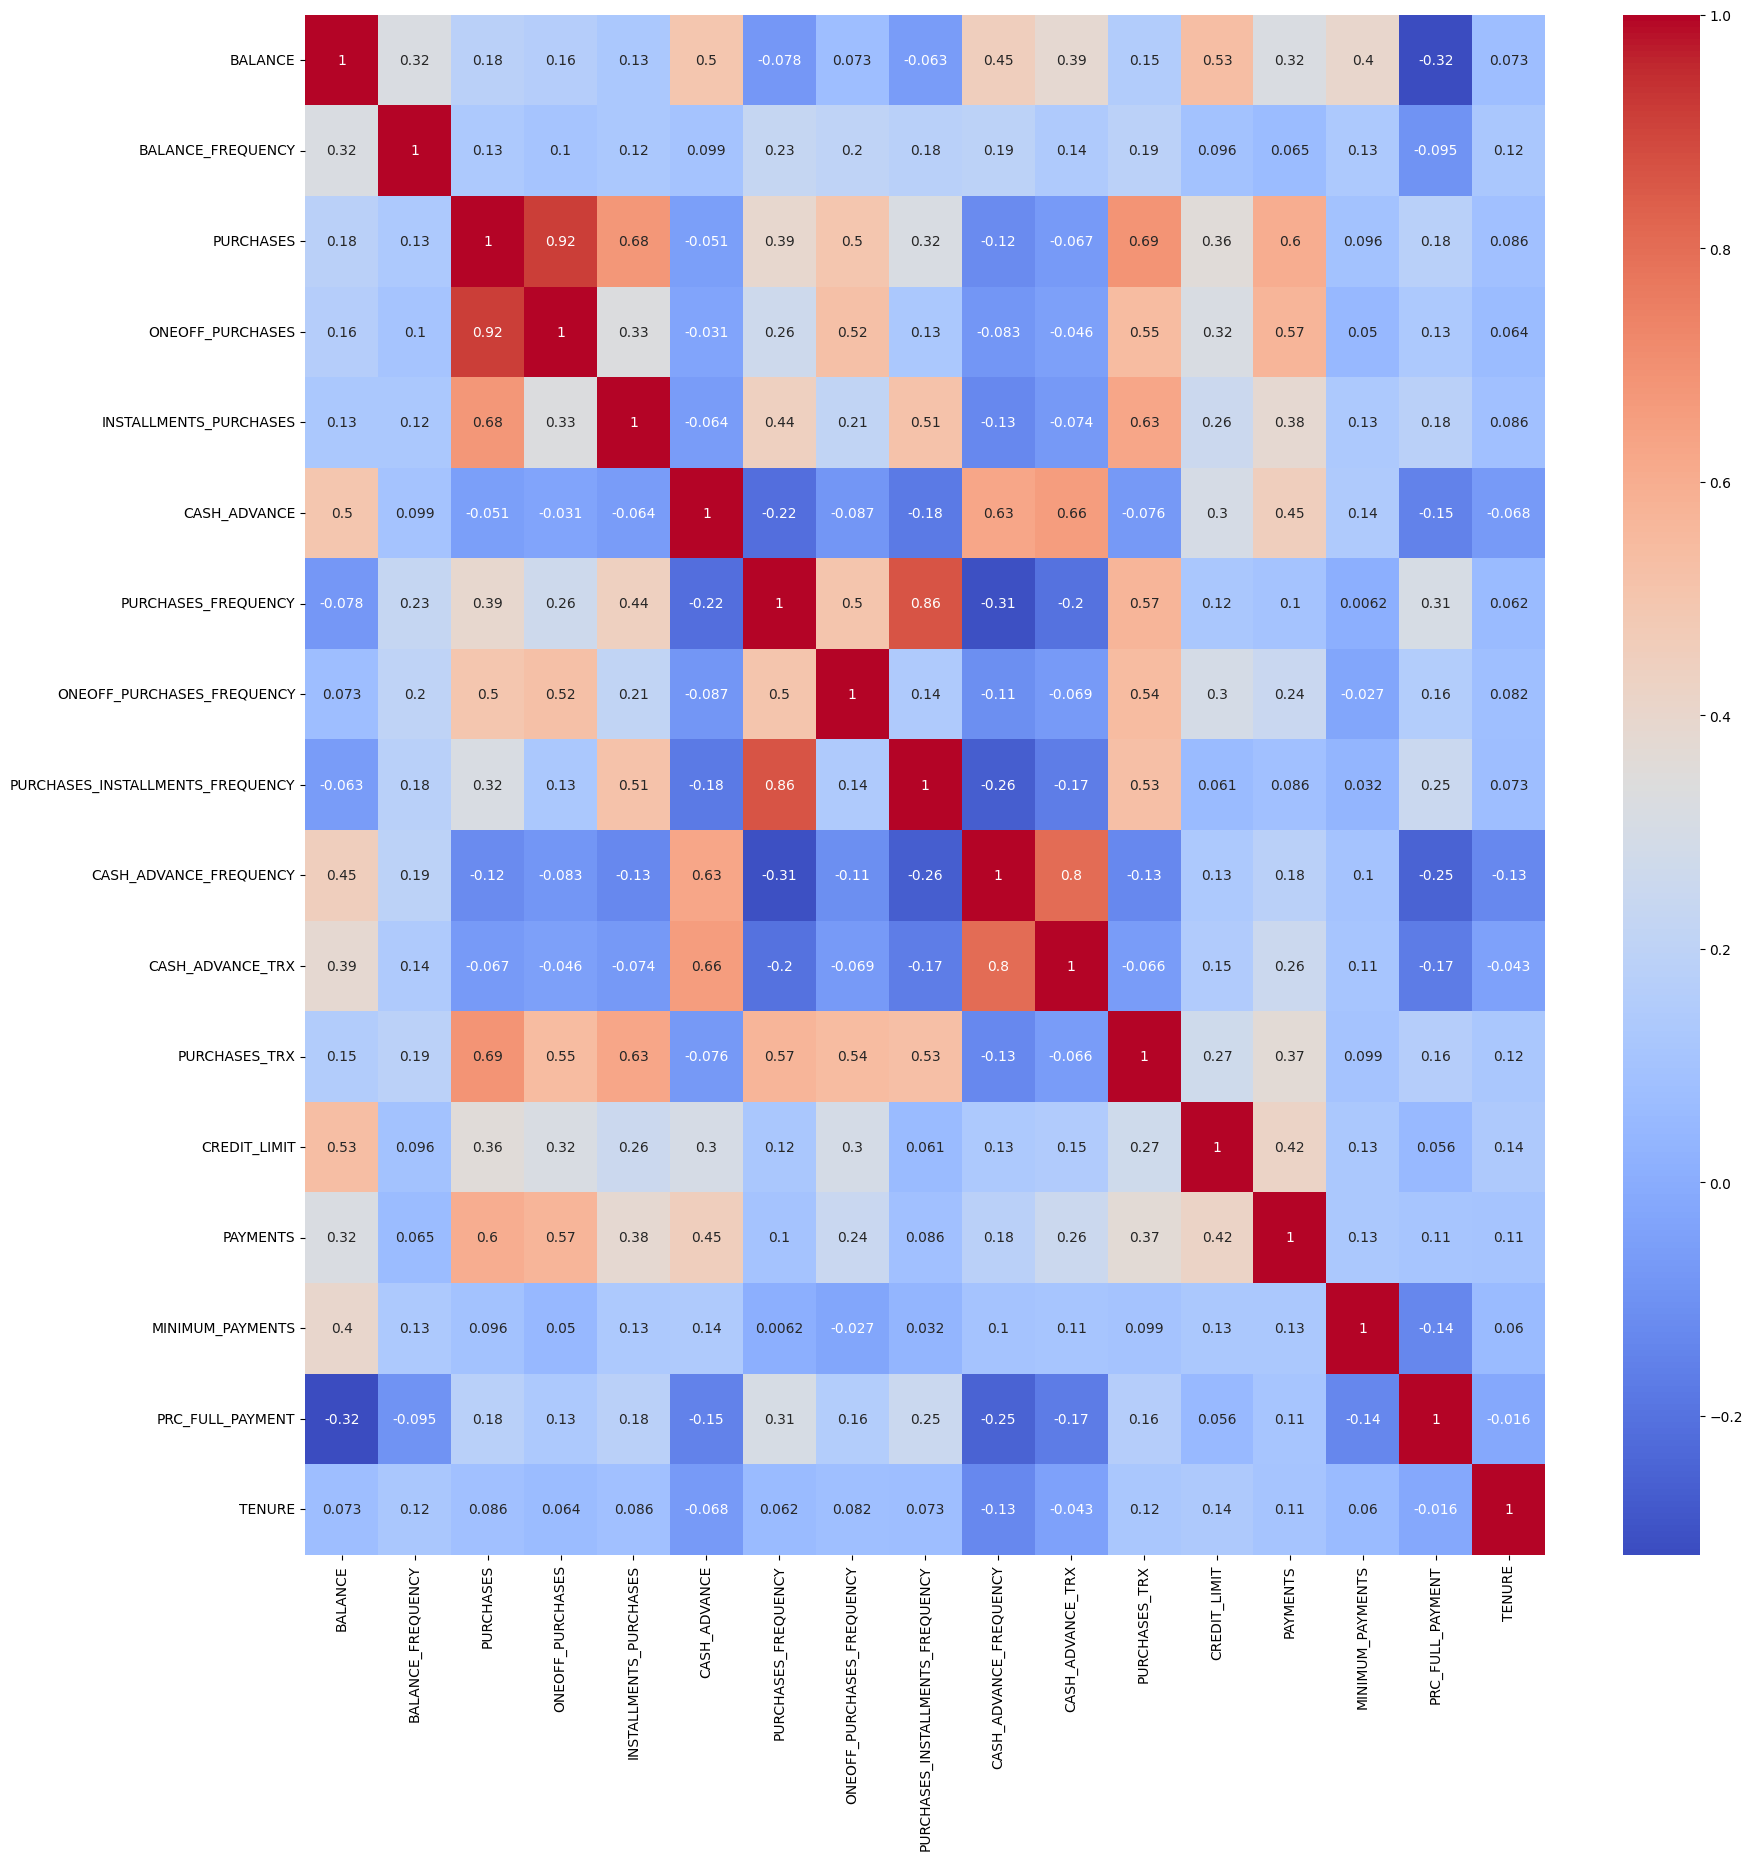

In [20]:
# Plot the correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=True)
plt.show()

In [21]:
# Identify and remove redundant features. use 0.8 threshold.
threshold = 0.8
upper_tri = corr_matrix.abs().where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > threshold)]
df.drop(columns=to_drop, inplace=True)
print(f'Redundant features:{to_drop}')

Redundant features:['ONEOFF_PURCHASES', 'PURCHASES_INSTALLMENTS_FREQUENCY']


## Standardize the Data (5 points)
Standardize the dataset using z-score normalization

In [22]:
# todo
scaler = StandardScaler()
scaler.fit(df)
scaled_df = scaler.transform(df)
df = pd.DataFrame(scaled_df, index=df.index, columns=df.columns)

Why is it important to standardize the data before applying PCA?
<br>
Answer: Standardizing the data before applying PCA is crucial because PCA is sensitive to the scale of the variables. If the features have different units or scales, those with larger scales can dominate the principal components, leading to biased results. By standardizing (scaling to mean 0 and standard deviation 1), we ensure that each feature contributes equally to the analysis, allowing PCA to accurately identify the underlying patterns in the data.

What is differnce between Normalizer and StandardScaler classes. which is better for PCA?
<br>
Answer: The StandardScaler standardizes features by removing the mean and scaling to unit variance for each feature individually. This means each feature will have a mean of 0 and a standard deviation of 1.
\
The Normalizer, on the other hand, scales each sample (row) individually so that its norm (magnitude) is 1. It transforms the data by scaling feature vectors to unit norm, focusing on the samples rather than the features.
\
For PCA, the StandardScaler is better because PCA analyzes variances and covariances between features, which requires features to be on a similar scale. Using StandardScaler ensures that all features contribute equally to the analysis. Normalizer is not suitable for PCA because it normalizes samples, not features, and doesn't address the issue of differing feature scales.

## Principal Component Analysis (PCA) (35 points)
Implement PCA from scratch.

In [24]:
import numpy as np

class CustomPCA:
    def __init__(self, n_components=None):
        """
        Initialize the PCA class with the number of components to keep.
        n_components: Number of principal components to keep. If None, all components are kept.
        """
        self.n_components = n_components
        self.components = None  # To store the principal components (eigenvectors)
        self.mean = None        # To store the mean of the data (used for centering the data)
        self.explained_variance_ratio = None  # To store the explained variance ratio of the components

    def fit(self, X):
        """
        Fit the PCA model on the dataset X by calculating the eigenvalues and eigenvectors of the covariance matrix.
        X: Input data (n_samples, n_features)
        """
        self.mean = np.mean(X, axis=0)
        X_centered = X - self.mean
        covariance_matrix = np.cov(X_centered, rowvar=False)
        eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
        sorted_indices = np.argsort(eigenvalues)[::-1]
        sorted_eigenvalues = eigenvalues[sorted_indices]
        sorted_eigenvectors = eigenvectors[:, sorted_indices]
        if self.n_components is not None:
          sorted_eigenvectors = sorted_eigenvectors[:, :self.n_components]
          sorted_eigenvalues = sorted_eigenvalues[:self.n_components]
        self.components = sorted_eigenvectors
        total_variance = np.sum(eigenvalues)
        self.explained_variance_ratio = sorted_eigenvalues / total_variance

    def transform(self, X):
        """
        Transform the input data X into the new space using the principal components.
        X: Input data (n_samples, n_features)
        """
        X_centered = X - self.mean
        X_transformed = np.dot(X_centered, self.components)
        # Return the transformed data
        return X_transformed
    def get_explained_variance_ratio(self):
        """
        Return the explained variance ratio of each principal component.
        """
        return self.explained_variance_ratio

    def get_components(self):
        """
        Return the principal components (eigenvectors).
        """
        return self.components

### Visualizing the Cumulative Variance

Plot the cumulative explained variance to visualize the selection of components.  How many components are needed to explain 75% of the variance?
<br>
answer: 6 based on the plot below

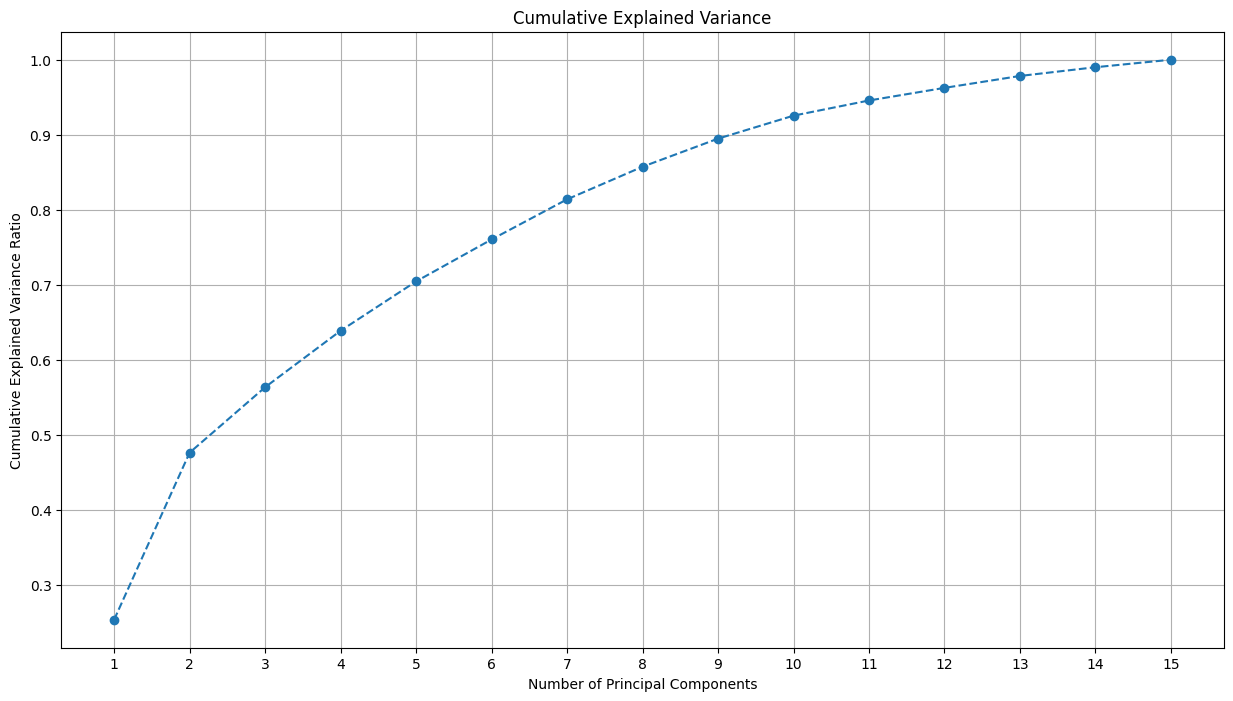

In [28]:
# todo
pca = CustomPCA()
pca.fit(df)
explained_variance_ratio = pca.get_explained_variance_ratio()
cumulative_variance = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(15, 8))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.xticks(range(1, len(cumulative_variance) + 1))  # Ensure x-ticks are integer numbers
plt.grid(True)
plt.show()


Build a new DataFrame with the first slected components. save it to a new CSV file named 'pca_output.csv'

In [35]:
#Build a new DataFrame with the first slected components
principal_components = pca.transform(df)
first_five_components = principal_components[:, :5]
new_df = pd.DataFrame(
    first_five_components,
    columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5']
)
new_df.head()

,PC1,PC2,PC3,PC4,PC5
0,1.731242,0.824084,-0.384320,-0.451623,-0.087766
1,0.301398,-2.533638,0.621582,-0.939313,-0.794456
2,-1.194199,0.887568,-1.184455,1.129115,-1.152626
3,0.930140,0.030106,-0.111213,-1.309452,-0.505452
4,1.499511,0.517780,-0.794300,-0.125376,-0.253049


We expect these new features to be orthogonal to each other. Check this and show the correlation between the features.

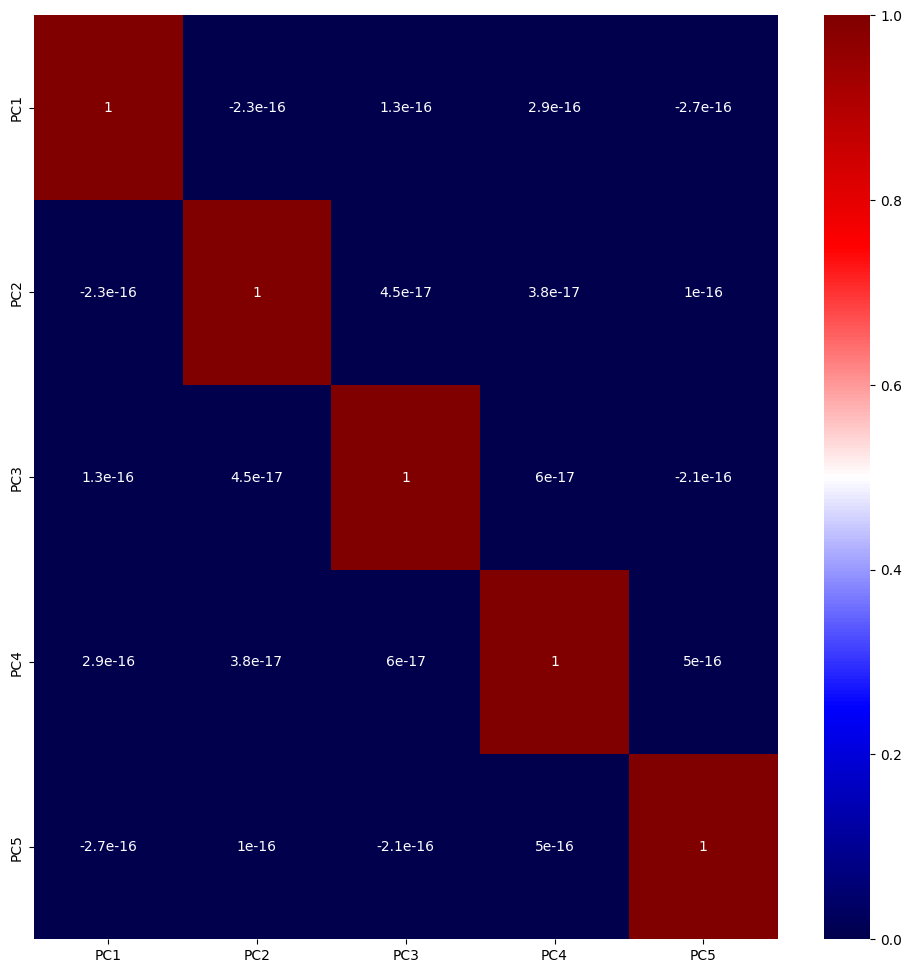

In [36]:
# todo
pca_corr = new_df.corr()
plt.figure(figsize=(12, 12))
sns.heatmap(pca_corr, cmap="seismic", annot=True)
plt.show()

## KMeans (45 points)
Implement kmeans from scratch.

In [40]:
import numpy as np

class CustomKMeans:
    def __init__(self, n_clusters=3, max_iter=100, random_state=42):
        """
        Initialize the KMeans class with the number of clusters and maximum iterations.
        n_clusters: Number of clusters to form.
        max_iter: Maximum number of iterations for convergence.
        random_state: Seed for reproducibility.
        """
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.random_state = random_state
        self.centroids = None  # To store the centroids of clusters
        self.inertia_ = None   # To store the inertia (within-cluster sum of squares)
        self.labels_ = None    # To store the label assigned to each data point (cluster assignment)

    def fit(self, X):
        """
        Fit the KMeans model on the dataset X.
        X: Input data (n_samples, n_features)
        """
        np.random.seed(self.random_state)
        n_samples, n_features = X.shape
        initial_indices = np.random.choice(n_samples, self.n_clusters, replace=False)
        X = np.array(X)
        self.centroids = X[initial_indices]
        for iteration in range(self.max_iter):
            distances = np.linalg.norm(X[:, np.newaxis] - self.centroids, axis=2)
            self.labels_ = np.argmin(distances, axis=1)
            new_centroids = np.zeros_like(self.centroids)
            for j in range(self.n_clusters):
                points_in_cluster = X[self.labels_ == j]
                if len(points_in_cluster) > 0:
                    new_centroids[j] = points_in_cluster.mean(axis=0)
                else:
                    new_centroids[j] = X[np.random.choice(n_samples)]
            if np.allclose(self.centroids, new_centroids, atol=1e-4):
                break
            self.centroids = new_centroids
        self.inertia_ = self._calculate_inertia(X)
        return self

    def _calculate_inertia(self, X):
        """
        Calculate the within-cluster sum of squared distances (inertia).
        X: Input data (n_samples, n_features)
        Returns: inertia (float)
        """
        # Step 1: For each cluster, compute the squared distances of points from their corresponding centroid
        # Step 2: Sum all squared distances to compute inertia
        inertia = 0
        for j in range(self.n_clusters):
            cluster_points = X[self.labels_ == j]
            if cluster_points.size == 0:
                continue
            distances = np.linalg.norm(cluster_points - self.centroids[j], axis=1)
            inertia += np.sum(distances ** 2)
        return inertia

### Elbow Method
Apply the elbow method to determine the optimal number of clusters for K-Means. what is the best number of clusters?

In [41]:
# Initialize an empty list to store the WCSS values for each number of clusters
WCSS = []

# Apply KMeans for a range of cluster values (from 1 to 30)
for i in range(1, 30):
    # Initialize the CustomKMeans with `i` clusters and a random state of 42
    kmeans_pca = CustomKMeans(n_clusters=i, random_state=42)

    # Fit the model to the PCA-transformed data
    kmeans_pca.fit(new_df)

    # Append the calculated inertia (WCSS) to the WCSS list
    WCSS.append(kmeans_pca.inertia_)

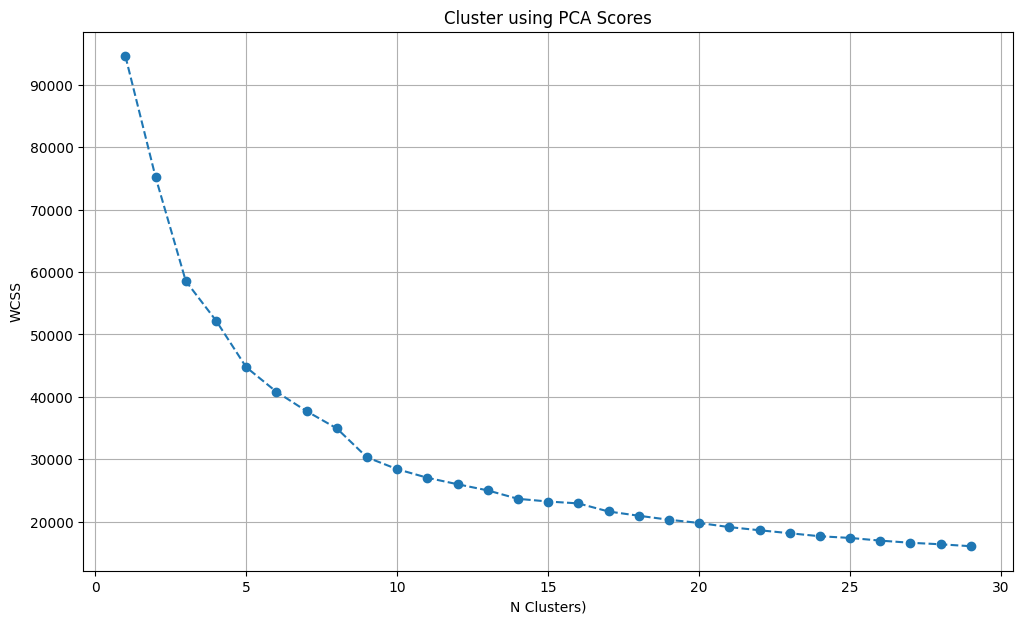

In [44]:
# Plot the Elbow curve using Matplotlib
plt.figure(figsize=(12, 7))
plt.plot(range(1, 30), WCSS, marker='o', linestyle='--')
plt.title('Cluster using PCA Scores')
plt.xlabel('N Clusters)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

Apply the optimal KMeans clustering on the PCA-transformed data, and assign cluster labels to each observation. Add a new column named segment to the df_pca DataFrame to store these labels.

In [48]:
# Apply KMeans on PCA-reduced data with the optimal number of clusters based on the elbow method
k_optimal = 9
kmeans_optimal = CustomKMeans(n_clusters=k_optimal)
kmeans_optimal.fit(new_df)

In [49]:
# Add a new column 'segment' to pca data frame and assign the cluster labels to each observation
cluster_labels = kmeans_optimal.labels_
new_df['segment'] = cluster_labels
new_df.head()

,PC1,PC2,PC3,PC4,PC5,segment
0,1.731242,0.824084,-0.384320,-0.451623,-0.087766,5
1,0.301398,-2.533638,0.621582,-0.939313,-0.794456,6
2,-1.194199,0.887568,-1.184455,1.129115,-1.152626,3
3,0.930140,0.030106,-0.111213,-1.309452,-0.505452,5
4,1.499511,0.517780,-0.794300,-0.125376,-0.253049,5


 visualize the clustering by plotting the pairwise relationships of the PCA-reduced features, color-coded by the cluster assignments.

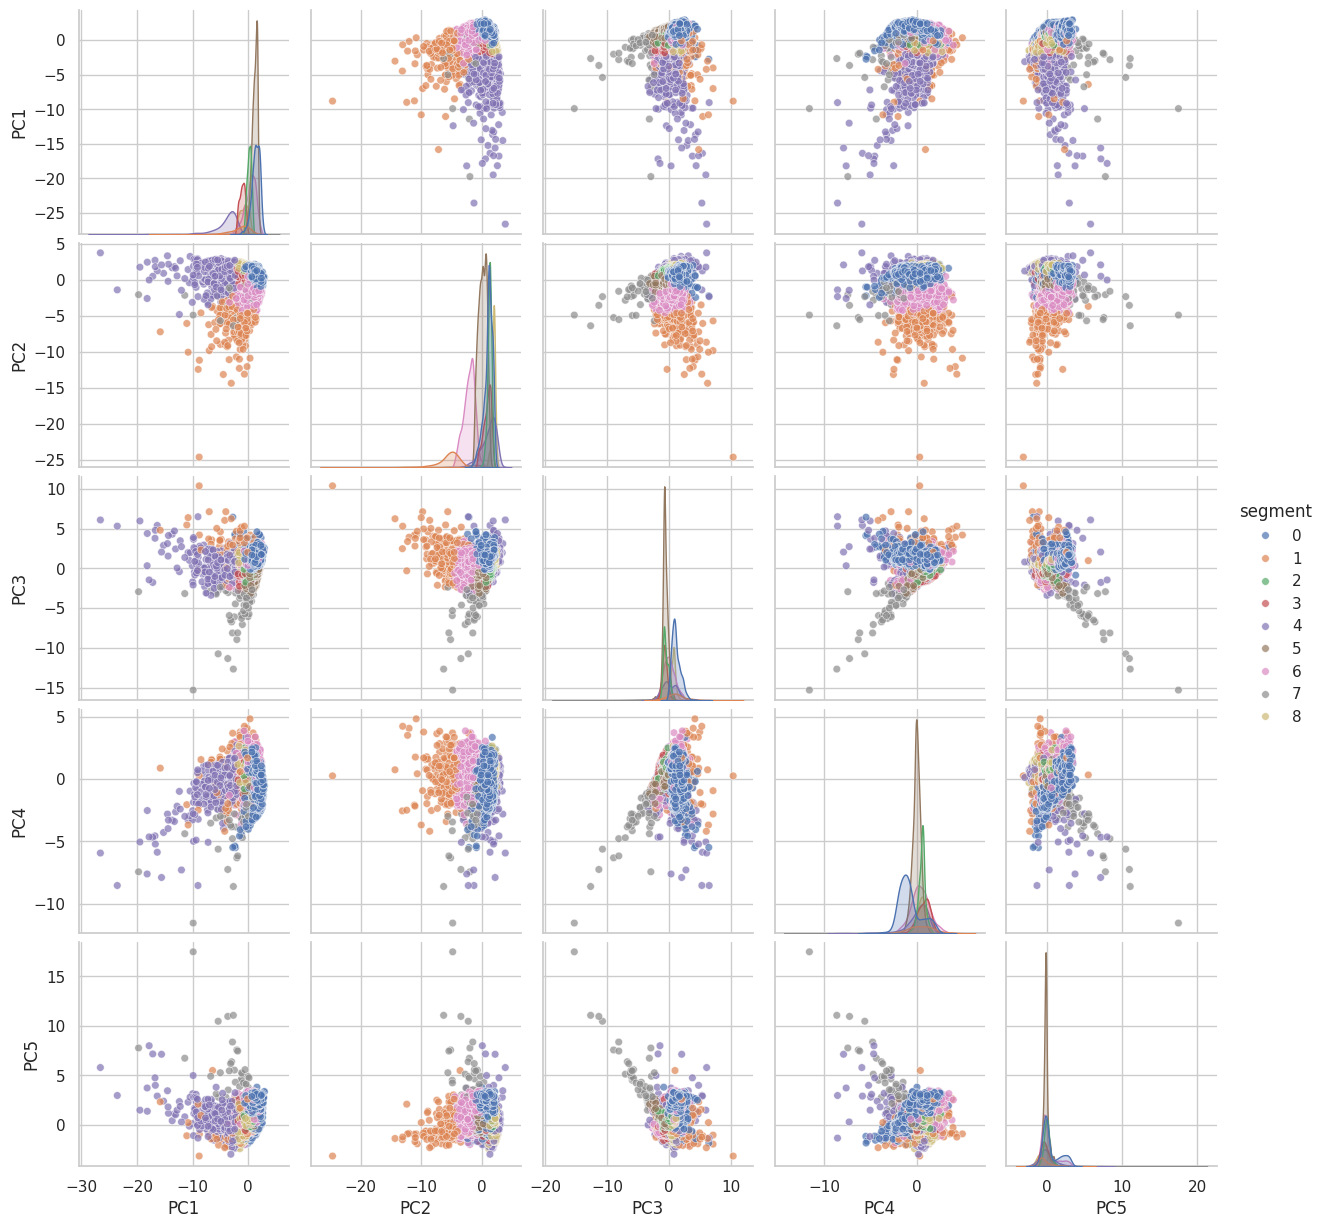

In [56]:
# todo
sns.set(style="whitegrid")
pair_plot = sns.pairplot(new_df, hue='segment', palette='deep', markers='o',
                         plot_kws={'alpha': 0.7, 's': 30})
plt.show()

So, when we employ PCA prior to using K-means we can visually separate almost the entire data set. That was one of the biggest goals of PCA - to reduce the number of variables by combining them into bigger, more meaningful features.

### Hierarchical Clustering
Perform hierarchical clustering on the reduced dataset after PCA. Use complete linkage method.


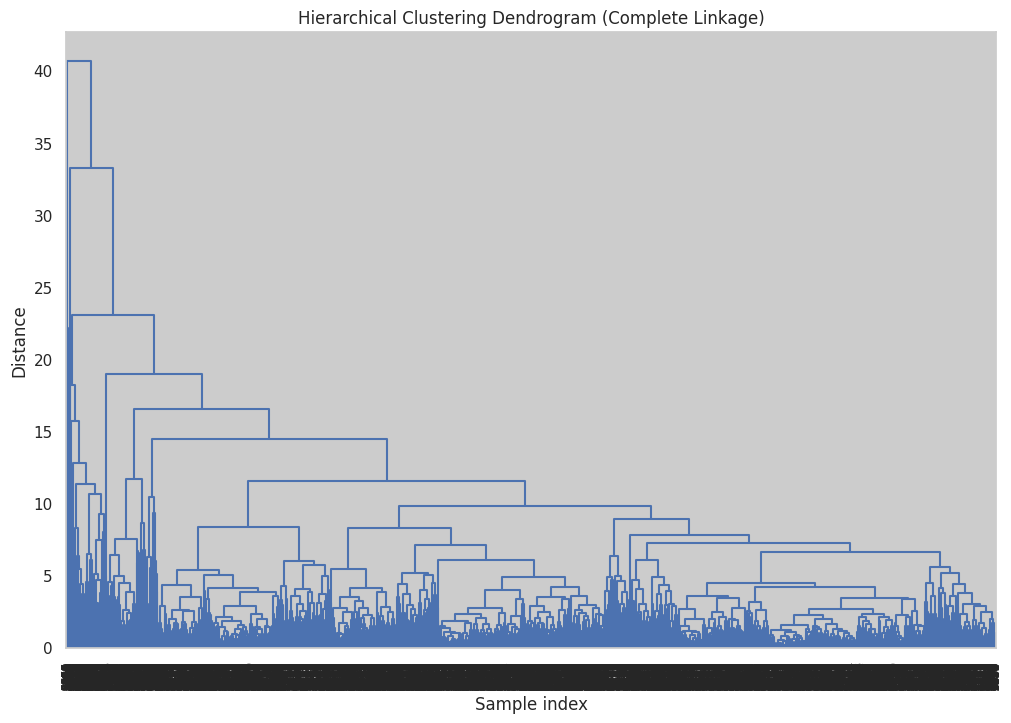

In [57]:
# Perform Hierarchical Clustering on the pca dataset
pca_data = new_df.values
Z = linkage(pca_data, method='complete')

# Visualize the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(Z, leaf_rotation=90, leaf_font_size=8, color_threshold=0)
plt.title('Hierarchical Clustering Dendrogram (Complete Linkage)')
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()

"Use scipy.cluster.hierarchy.fcluster to assign clusters from the dendrogram with a specified number of 5 clusters. Then visualize the results using pairplots.

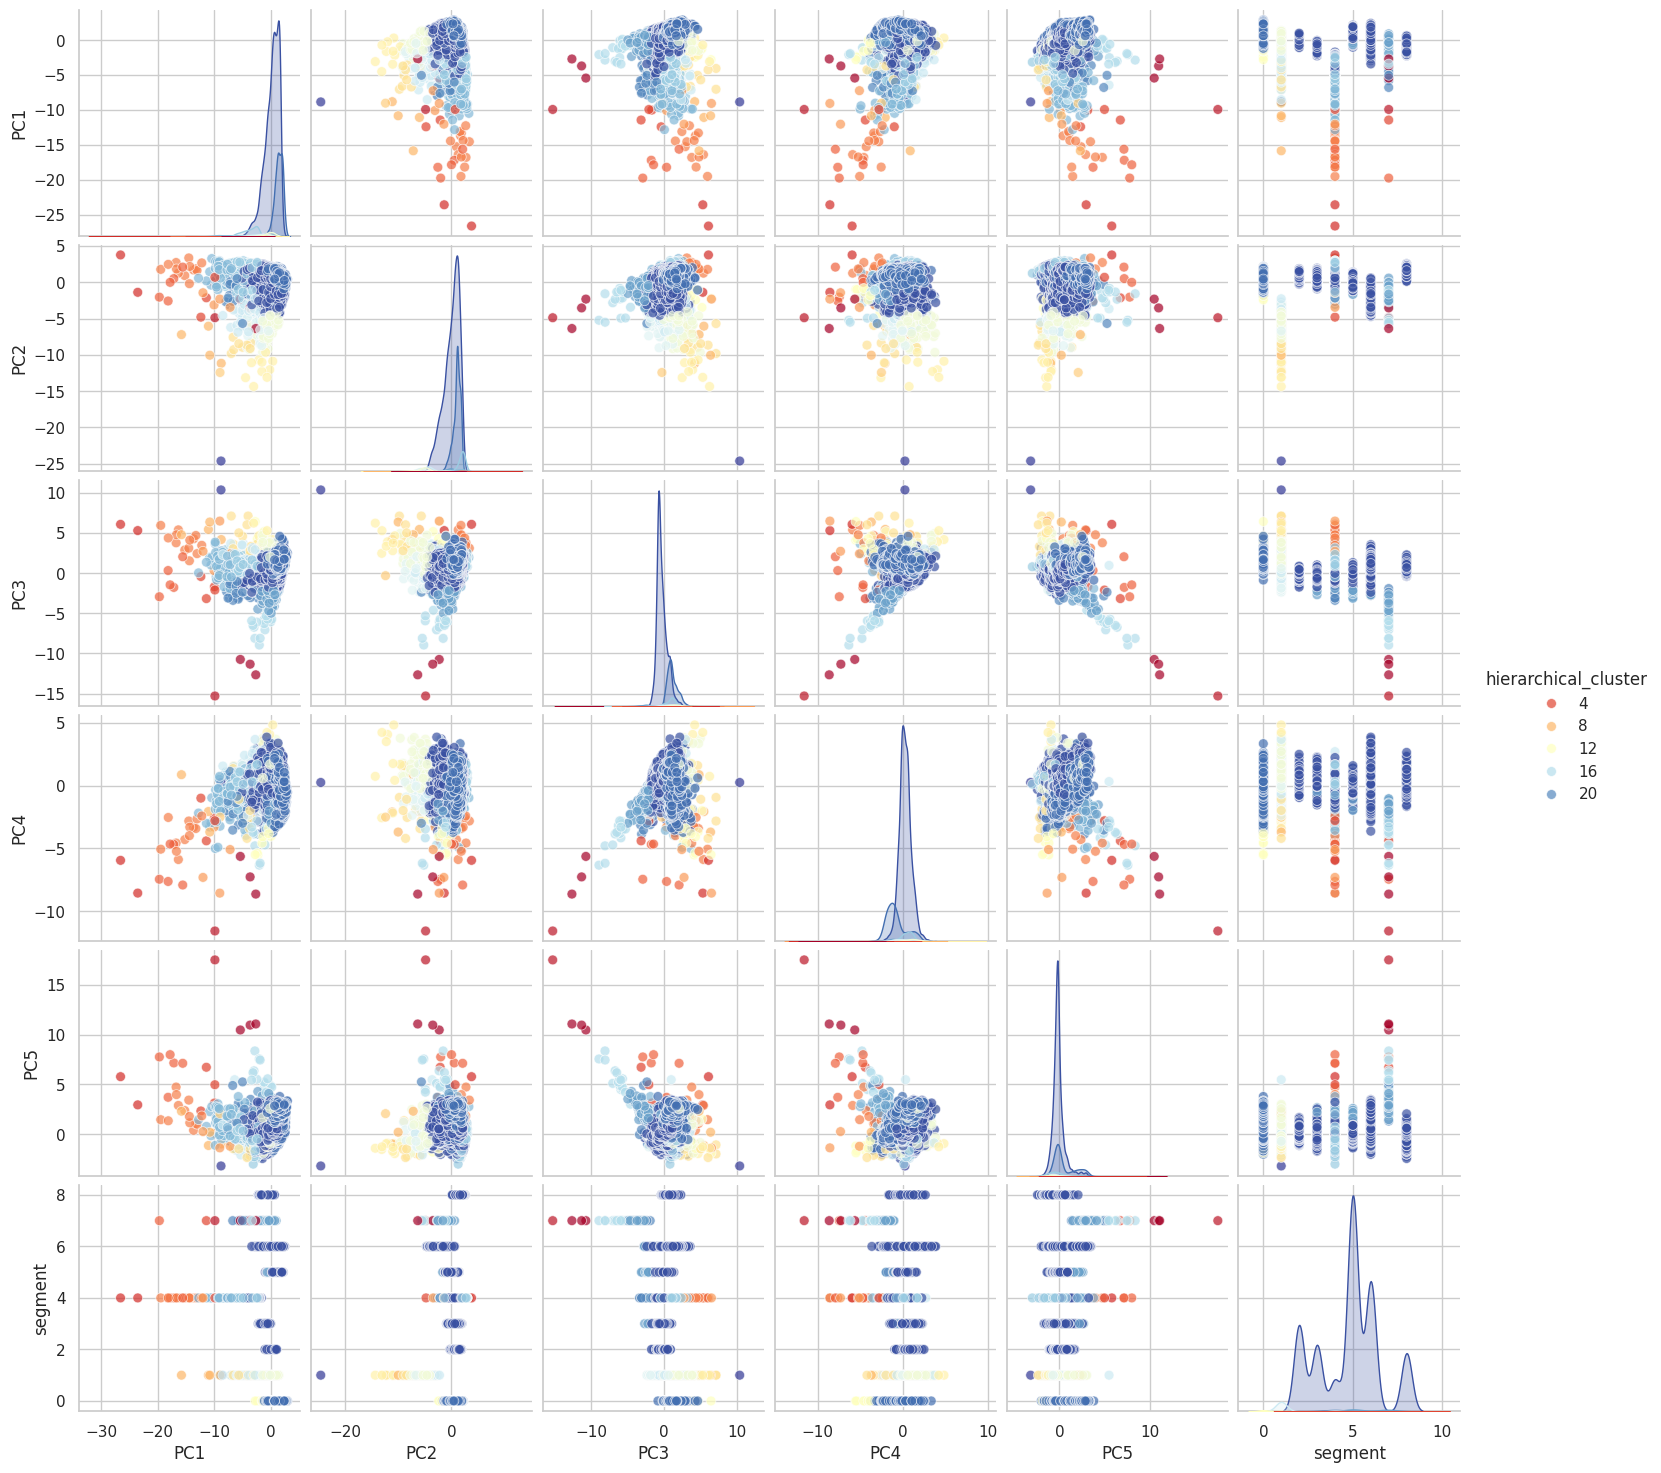

In [58]:
# Choose threshold and assign clusters
threshold = 10
cluster_labels = fcluster(Z, t=threshold, criterion='distance')

# Assign cluster labels to PCA DataFrame
new_df['hierarchical_cluster'] = cluster_labels

# Visualize using PCA components
sns.set(style="whitegrid")
pair_plot = sns.pairplot(new_df, hue='hierarchical_cluster', palette='RdYlBu', markers='o',
                         plot_kws={'alpha': 0.7, 's': 50})
plt.show()